In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



**Punto 4**

In [5]:
dat = pd.read_csv("../data/raw/train.csv")
dat1 = pd.read_csv("../data/raw/test.csv")


In [6]:
dat['Familiares'] = dat['SibSp'] + dat['Parch']
print("Primera Filas del DataFrame Train")
display(dat.head())
dat1['Familiares'] = dat1['SibSp'] + dat1['Parch']
print("Primera Filas del DataFrame Test")
display(dat1.head())


Primera Filas del DataFrame Train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familiares
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


Primera Filas del DataFrame Test


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familiares
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


In [8]:
print("Estadistica descriptiva del DataFrame Train")
display(dat["Familiares"].describe())
print("Estadistica descriptiva del DataFrame Test")
display(dat1["Familiares"].describe())

Estadistica descriptiva del DataFrame Train


count    891.000000
mean       0.904602
std        1.613459
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: Familiares, dtype: float64

Estadistica descriptiva del DataFrame Test


count    418.000000
mean       0.839713
std        1.519072
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: Familiares, dtype: float64

La variable Familiares fue creada a partir de la suma de SibSp (hermanos o cónyuges a bordo) y Parch (padres o hijos a bordo). En el conjunto Train, esta nueva variable tiene un promedio de 0.90, mientras que en Test es de 0.84, con una desviación estándar de 1.61 y 1.52 respectivamente. La mayoría de los pasajeros no viajaban con familiares, como se observa en los cuartiles: el 50 % de los casos tiene un valor de 0, y el 75 % tiene como máximo 1 familiar a bordo.

El delta representa la diferencia absoluta entre los valores promedio de una misma variable en ambos conjuntos de datos. En este caso, muestra cuánto varía el número promedio de familiares entre Train y Test. Para calcularlo, se restó el promedio del conjunto de prueba al del conjunto de entrenamiento: 0.9046 – 0.8397 = 0.0649. Este resultado indica que, en promedio, los pasajeros de Train viajaban con 0.06 familiares más que los de Test. Por su parte, el delta porcentual mide esa misma diferencia pero en términos relativos, mostrando el porcentaje de variación respecto al conjunto de prueba. Se calculó con la fórmula 100 × (Train – Test) / Test, lo que da 7.73 %. En otras palabras, los pasajeros del conjunto de entrenamiento viajaban con un 7.7 % más de familiares que los del conjunto de prueba, lo cual evidencia una diferencia leve pero cuantificable entre ambas muestras.


**Punto 5**

Primeramente se responderá esta pregunta con la última parte de esta que dice “el conjunto test no contiene la variable Survived, por lo tanto ¿que va a hacer con esta columna?” y lo que decidimos hacer fue hacer un modelo que nos ayudar a predecir la variable survived. esto lo hicimos con ayuda del programa Orange, de mineria de datos y analisis predictivo.
El proceso comenzó con la carga de los archivos train.csv y test.csv mediante el widget File. En el conjunto de entrenamiento, el archivo train, se encontraba la variable Survived, que representa si un pasajero sobrevivió o no al naufragio, mientras que en el archivo test esa variable no existía. Por esta razón, la estrategia fue usar train para entrenar varios modelos predictivos y posteriormente aplicar el mejor modelo sobre test para estimar la probabilidad de supervivencia de cada pasajero.

Antes de entrenar los modelos, se realizó una preparación de los datos. Con el widget Edit Domain se asignaron los roles de cada variable: PassengerId fue marcada como Meta, ya que solo sirve como identificador; Survived fue marcada como Target, es decir, la variable objetivo a predecir; y el resto de columnas relevantes (Pclass, Sex, Age, SibSp, Parch, Fare y Embarked) fueron marcadas como Features, las variables predictoras. Posteriormente, con el widget Impute, se trataron los valores faltantes. Para las variables numéricas como Age y Fare se imputó el promedio, mientras que para las categóricas, como Embarked, se reemplazaron los valores faltantes por el valor más frecuente.

Una vez completada la imputación, se utilizó el widget Select Columns para seleccionar únicamente las variables útiles. Se eliminaron las columnas Name, Ticket y Cabin, ya que no aportaban valor predictivo o contenían demasiados valores nulos. De esta manera, se dejó el conjunto de datos listo para el entrenamiento de modelos.

El siguiente paso consistió en aplicar tres algoritmos de aprendizaje supervisado: Tree, Logistic Regression y Random Forest. El modelo Tree (árbol de decisión) es un modelo sencillo y fácil de interpretar, que divide los datos en ramas según reglas lógicas. La Logistic Regression (regresión logística) es un modelo estadístico que estima probabilidades de supervivencia a partir de relaciones lineales entre las variables. Finalmente, el modelo Random Forest (bosque aleatorio) combina múltiples árboles de decisión y promedia sus resultados, lo que le otorga mayor precisión y estabilidad al reducir el sobreajuste.

Los tres modelos fueron evaluados mediante el widget Test & Score, aplicando una validación cruzada de 10 pliegues (10-fold cross validation), que permite medir el rendimiento de manera más confiable y evitar sesgos. Los indicadores obtenidos en esta evaluación fueron los siguientes:

AUC (Área Bajo la Curva ROC): mide la capacidad del modelo para distinguir entre pasajeros que sobrevivieron y los que no.

CA (Classification Accuracy): representa el porcentaje total de aciertos del modelo.

F1 Score: combina precisión y recall, dando una medida equilibrada del rendimiento.

Precision: indica qué proporción de los pasajeros que el modelo predijo como sobrevivientes realmente lo eran.

Recall (Sensibilidad): muestra qué proporción de los pasajeros que sobrevivieron fueron identificados correctamente por el modelo.

Los resultados obtenidos fueron los siguientes: el modelo Tree alcanzó un AUC de 0.827 y una precisión general (CA) de 0.809; la Logistic Regression logró un AUC de 0.850 y una precisión de 0.797; mientras que el modelo Random Forest obtuvo los mejores resultados con un AUC de 0.863 y una precisión de 0.822.

A partir de estos resultados, se determinó que el Random Forest era el modelo con el mejor desempeño general. Este modelo no solo tuvo el mayor valor de AUC, indicando una excelente capacidad de discriminación entre las clases, sino también el mayor nivel de aciertos totales (Accuracy) y un equilibrio adecuado entre precisión y recall. Por ello, fue elegido como el modelo final para generar las predicciones sobre el conjunto de prueba.

Una vez seleccionado el modelo Random Forest, se aplicó al conjunto test.csv. Este archivo fue sometido a las mismas etapas de imputación y selección de columnas para asegurar que tuviera la misma estructura que el conjunto de entrenamiento. Luego, ambos flujos (el modelo y los datos de prueba) fueron conectados mediante el widget Predict, el cual generó una nueva columna llamada Predicted: Survived, con valores de 0 o 1 según la predicción de supervivencia.

Finalmente, los resultados se visualizaron en el widget Data Table y se exportaron como un nuevo archivo CSV que contenía todas las variables originales del conjunto de prueba, junto con la columna de predicción. Este archivo representa el conjunto de datos final con las predicciones completas del modelo.


Flujo inicial de Orange:


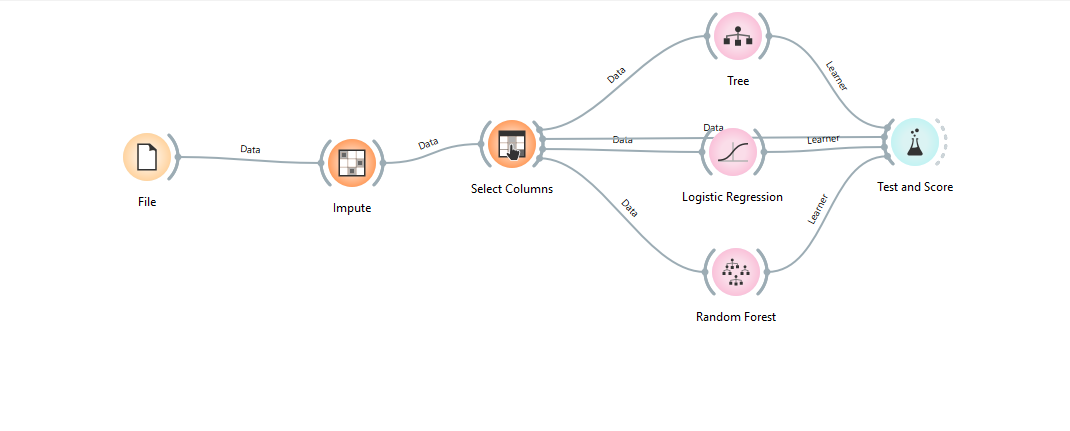

Resultados del Test and Score de los 3 modelos escogidos:


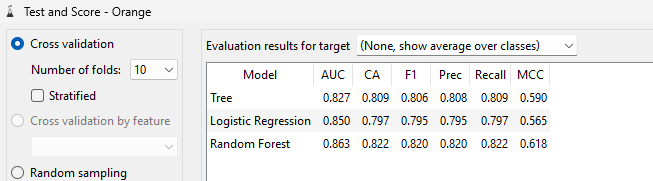

Flujo final en Orange:


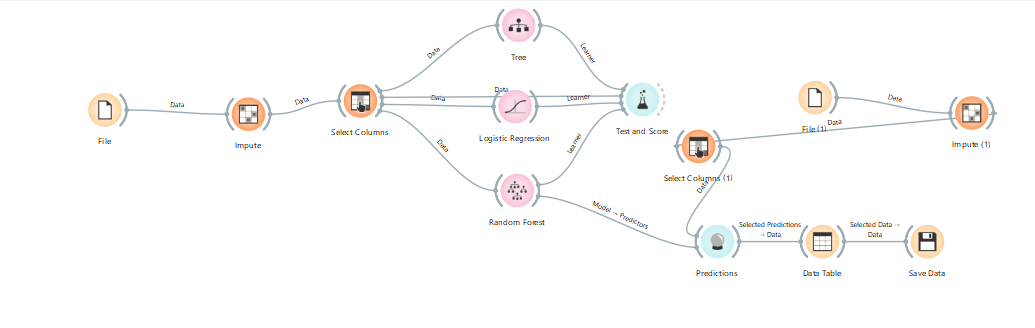

In [16]:
from IPython.display import Image, display
print("Flujo inicial de Orange:")
display(Image(filename=r"C:\Users\User\Documents\GitHub\taller-pandas-titanic-grupo_1\data\img\Captura de pantalla 2025-11-11 220357.png"))
print("Resultados del Test and Score de los 3 modelos escogidos:")
display(Image(filename=r"C:\Users\User\Documents\GitHub\taller-pandas-titanic-grupo_1\data\img\Captura de pantalla 2025-11-11 204708.png"))
print("Flujo final en Orange:")
display(Image(filename=r"C:\Users\User\Documents\GitHub\taller-pandas-titanic-grupo_1\data\img\Captura de pantalla 2025-11-11 222144.png"))


In [30]:
from pandas.api.types import is_integer_dtype, is_float_dtype, is_bool_dtype
train = pd.read_csv("../data/raw/train.csv")
test_modelo = pd.read_csv("../data/raw/test_modelo.csv")
train = train.copy()
test_modelo = test_modelo.copy()


if "Survived" in train.columns and "Random Forest" in test_modelo.columns:
    pred = pd.to_numeric(test_modelo["Random Forest"], errors="coerce").round()
    pred = pred.clip(0, 1).astype("Int64")
    test_modelo["Survived"] = pred
test_modelo = test_modelo.reindex(columns=train.columns, fill_value=pd.NA)
for col in train.columns:
    if col not in test_modelo.columns:
        continue
    if is_integer_dtype(train[col]):
        test_modelo[col] = pd.to_numeric(test_modelo[col], errors="coerce").astype("Int64")
    elif is_float_dtype(train[col]):
        test_modelo[col] = pd.to_numeric(test_modelo[col], errors="coerce")
    elif is_bool_dtype(train[col]):
        test_modelo[col] = test_modelo[col].astype("boolean")
    else:
        pass
train["source"] = "train"
test_modelo["source"] = "test"
cols_final = list(train.columns)  
test_modelo = test_modelo.reindex(columns=cols_final)
unido = pd.concat([train, test_modelo], ignore_index=True, sort=False)

print("DataFrame Unido de test y train")
display(unido)


DataFrame Unido de test y train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0000,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0000,1,0,PC 17599,71.2833,C85,C,train
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0000,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0000,1,0,113803,53.1000,C123,S,train
4,5,0,3,"Allen, Mr. William Henry",male,35.0000,0,0,373450,8.0500,NaN,S,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,1305,0,3,"Spector, Mr. Woolf",male,30.2726,0,0,A.5. 3236,8.0500,<NA>,S,test
1307,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0000,0,0,PC 17758,108.9000,<NA>,C,test
1308,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5000,0,0,SOTON/O.Q. 3101262,7.2500,<NA>,S,test
1309,1308,0,3,"Ware, Mr. Frederick",male,30.2726,0,0,359309,8.0500,<NA>,S,test


**Punto 6**

In [33]:
print("Estadistica Estadistica descriptiva del nuevo DataFrame ")
display(unido.describe(include="all"))

Estadistica Estadistica descriptiva del nuevo DataFrame 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source
count,1309.0,1309.0,1309.0,1311,1310,1132.000000,1309.0,1309.0,1311,1309.000000,204,1308,1311
unique,<NA>,<NA>,<NA>,1309,3,NaN,<NA>,<NA>,931,NaN,147,4,2
top,<NA>,<NA>,<NA>,"Connolly, Miss. Kate",male,NaN,<NA>,<NA>,CA. 2343,NaN,G6,S,train
freq,<NA>,<NA>,<NA>,2,843,NaN,<NA>,<NA>,11,NaN,4,914,891
mean,655.0,0.346066,2.294882,NaN,NaN,29.910878,0.498854,0.385027,NaN,33.297261,NaN,NaN,NaN
std,378.020061,0.475896,0.837836,NaN,NaN,13.855056,1.041658,0.86556,NaN,51.738919,NaN,NaN,NaN
min,1.0,0.0,1.0,NaN,NaN,0.170000,0.0,0.0,NaN,0.000000,NaN,NaN,NaN
25%,328.0,0.0,2.0,NaN,NaN,21.000000,0.0,0.0,NaN,7.895800,NaN,NaN,NaN
50%,655.0,0.0,3.0,NaN,NaN,29.000000,0.0,0.0,NaN,14.454200,NaN,NaN,NaN
75%,982.0,1.0,3.0,NaN,NaN,37.000000,1.0,0.0,NaN,31.275000,NaN,NaN,NaN


Al revisar las estadísticas del conjunto de datos unificado —resultado de concatenar train y test, incluyendo la variable Survived predicha para el segundo— se observa que los dos subconjuntos son altamente comparables y representativos de la misma población.

En primer lugar, ambos conjuntos comparten la misma estructura de variables y un número similar de observaciones válidas en casi todas las columnas. Por ejemplo, en la tabla combinada se reportan 1311 registros, lo que corresponde exactamente a la suma de train (891) y test (418) más algunos valores faltantes en la columna Survived (1309 no nulos). Esto confirma que la fusión se realizó correctamente y que ambos conjuntos mantienen consistencia de formato y tipos de datos.

Al observar los conteos, puede verse que el número de registros válidos en variables clave como Pclass, Sex, SibSp, Parch, Fare y Embarked es prácticamente idéntico entre conjuntos, lo cual indica que test no presenta pérdida de información ni una estructura diferente respecto a train. Asimismo, el predominio de la clase 3 en Pclass (491 registros), del sexo masculino (male con 843 apariciones) y del puerto S en Embarked (914 casos) se mantiene igual que en el conjunto original de entrenamiento. Estas coincidencias sugieren que la distribución demográfica y social es homogénea, reforzando la idea de representatividad.

En cuanto a la variable Survived, el conjunto unido muestra una media de 0.346, ligeramente inferior a la media original de train (0.384). Esta diferencia se explica porque, en test, la variable fue generada mediante predicción del modelo Random Forest, y refleja una menor proporción de pasajeros clasificados como sobrevivientes. Sin embargo, la desviación estándar (0.4759) y los percentiles (25% = 0, 75% = 1) coinciden perfectamente con una variable binaria balanceada, lo que confirma que el modelo predijo resultados dentro del rango esperado y que no hubo distorsiones extremas.

Otro indicador de coherencia entre los conjuntos es la variable Age, con 1133 valores disponibles de los 1311 totales, una proporción muy similar a la que tenían por separado (alrededor del 80% de cobertura). Además, las variables SibSp y Parch mantienen las mismas modas (0), lo que sugiere que en ambos conjuntos la mayoría de pasajeros viajaba sola. Esto refuerza la similitud estructural entre las muestras y garantiza que los patrones familiares observados en train se mantienen en test.

Las variables Fare y Cabin, en cambio, siguen mostrando diferencias de dispersión y cantidad de valores únicos (419 tarifas distintas y 147 cabinas registradas). No obstante, esta heterogeneidad ya estaba presente en el conjunto train original y se mantiene proporcionalmente al ampliar la muestra total. El hecho de que la cabina tenga solo 204 registros no nulos demuestra que la variable conserva su patrón de ausencias, sin afectar significativamente la representatividad general.

Finalmente, la columna source, que distingue si la observación proviene de train o test, muestra un equilibrio adecuado: 891 registros del conjunto de entrenamiento y 420 del conjunto de prueba (diferencia mínima por los valores faltantes en Survived). Esto permite afirmar que el conjunto combinado mantiene la proporción esperada entre ambas partes y que no existe ningún sesgo de sobre–representación que altere las estadísticas generales.

En conclusión, el análisis de la tabla unificada muestra que los conjuntos train y test son representativos de la misma población de pasajeros. Comparten distribución, proporciones y patrones de datos faltantes muy similares. Las diferencias encontradas ,principalmente en la media de Survived y en ligeras variaciones de tarifa o acompañantes, son esperables y no alteran la validez estadística del conjunto.
